In [2]:
import pandas as pd
X = pd.DataFrame(pd.read_excel('dx03130112qux.xlsx')).values  
y = pd.DataFrame(pd.read_excel('dy03130112qux.xlsx')).values  

In [3]:
dataX = pd.read_excel("dx03130112qux.xlsx",
                      names=["Age","Sex","Radiation","Chemotherapy","Bone","Brain","Liver","Lung","Main bronchus",
                             "Upper lobe, lung","Middle lobe, lung",
                             "Lower lobe, lung","Overlapping lesion of lung","Lung, NOS"])

In [4]:
!pip list

Package                       Version
----------------------------- ---------------
aext_assistant                0.4.0
aext_assistant_server         0.4.0
aext_core                     0.4.0
aext_core_server              0.4.0
aext_shared                   0.4.0
aiobotocore                   2.5.0
aiofiles                      22.1.0
aiohttp                       3.8.5
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
anaconda-anon-usage           0.4.2
anaconda-catalogs             0.2.0
anaconda-client               1.12.1
anaconda-cloud-auth           0.5.0
anaconda-navigator            2.6.1
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens 

In [5]:
print(len(dataX))

2950


In [6]:
datay = pd.read_excel("dy03130112qux.xlsx",
                      names=["＜12"])

In [7]:
print(len(datay))

2950


In [8]:
y0 =datay['＜12']

In [9]:
X0 = dataX[["Age","Sex","Radiation","Chemotherapy","Bone","Brain","Liver","Lung","Main bronchus",
                             "Upper lobe, lung","Middle lobe, lung",
                             "Lower lobe, lung","Overlapping lesion of lung","Lung, NOS"]]

XGBoost模型的准确率： 0.8101694915254237


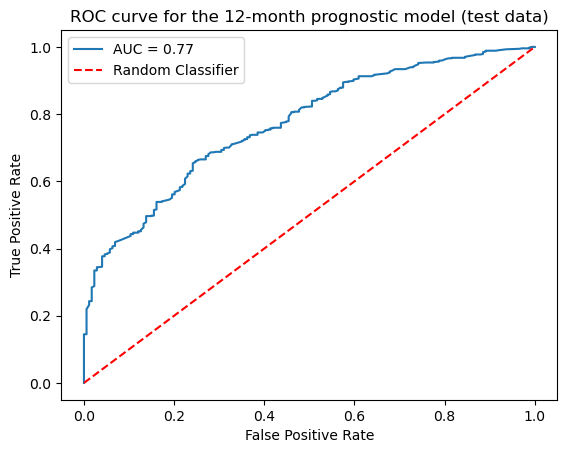

In [10]:
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

param_grid = {
    'max_depth': [3, 4, 5, 6],
    'n_estimators': [60, 70, 80, 90, 100],
    'learning_rate': [0.05, 0.1, 0.15],
    'subsample': [0.7, 0.75, 0.8, 0.85, 0.9],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
    'min_child_weight': [6, 8, 10]
}

xgb_model = XGBClassifier(
    objective='binary:logistic',
    nthread=4,
    scale_pos_weight=1,
    seed=16
)

grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=0
)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_model = XGBClassifier(
    learning_rate=best_params['learning_rate'],
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_child_weight=best_params['min_child_weight'],
    gamma=0,
    subsample=best_params['subsample'],
    colsample_bytree=best_params['colsample_bytree'],
    objective='binary:logistic',
    nthread=4,
    scale_pos_weight=1,
    seed=16
)

best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("XGBoost模型的准确率：", accuracy)

y_score = best_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_score)
auc_score = roc_auc_score(y_test, y_score)

plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for the 12-month prognostic model (test data)')
plt.legend()
plt.show()

In [11]:
#imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb

import shap
shap.initjs()

In [12]:
#Train model
model = xgb.XGBRegressor(learning_rate =0.1,
                      n_estimators=70,
                      max_depth=4,
                      min_child_weight=8,
                      gamma=0,
                      subsample=0.75,
                      colsample_bytree=0.8,
                      objective= 'binary:logistic',
                      nthread=4,
                      scale_pos_weight=1,
                      seed=16)
model.fit(X0,y0)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=8, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=70, n_jobs=None, nthread=4,
             num_parallel_tree=None, ...)

In [13]:
#Get shap values
explainer = shap.Explainer(model)
shap_values =explainer(X0)
#shap values =explainer(X[0:100])


In [14]:
np.shape(shap_values.values )

(2950, 14)

✅ 图像已保存至：D:\pythoncf\图4-12.tif


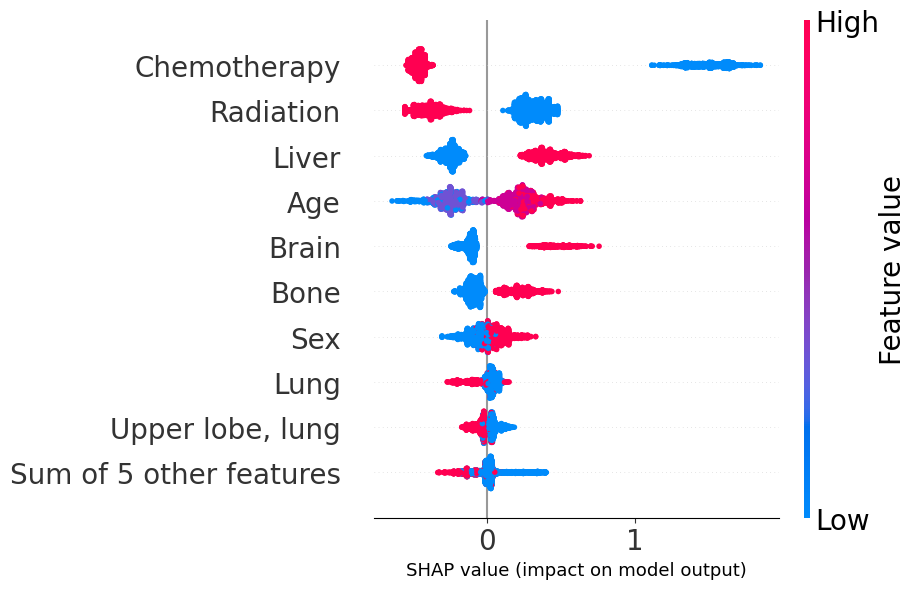

In [15]:
import shap
import matplotlib.pyplot as plt
import os 

shap.plots.beeswarm(shap_values, show=False)

fig = plt.gcf()
ax = plt.gca()

fig.set_size_inches(9, 6)

ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

cb = fig.axes[-1]
cb.tick_params(labelsize=20)
cb.set_ylabel("Feature value", fontsize=20)

plt.tight_layout()
plt.savefig(
    "图4-12.tif", 
    dpi=600, 
    bbox_inches="tight",
    pil_kwargs={'compression': 'tiff_lzw'} 
)

save_path = os.path.abspath("图4-12.tif")
print(f"✅ 图像已保存至：{save_path}")

plt.show()


In [16]:
import pandas as pd
Xtest = pd.DataFrame(pd.read_excel('dx03130112qut35.xlsx')).values  
ytest = pd.DataFrame(pd.read_excel('dy03130112qut35.xlsx')).values  

C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


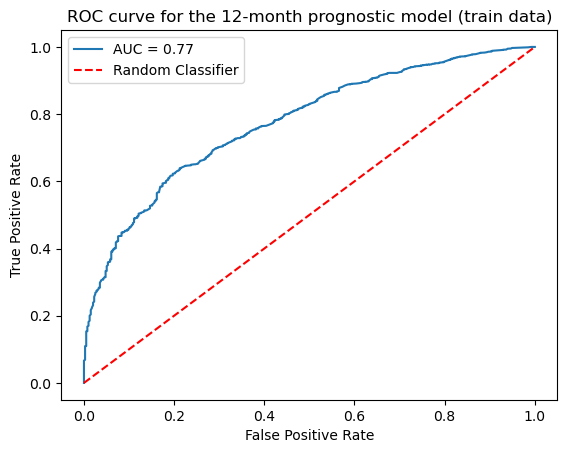

In [17]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 300]
}

base_model = LogisticRegression()

grid_search = GridSearchCV(
    estimator=base_model,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=0
)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

clf = LogisticRegression(**best_params)

clf.fit(X_train, y_train)

y_score = clf.predict_proba(X_train)[:, 1]

fpr, tpr, thresholds = roc_curve(y_train, y_score)
auc_score = roc_auc_score(y_train, y_score)

plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for the 12-month prognostic model (train data)')
plt.legend()
plt.show()

C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


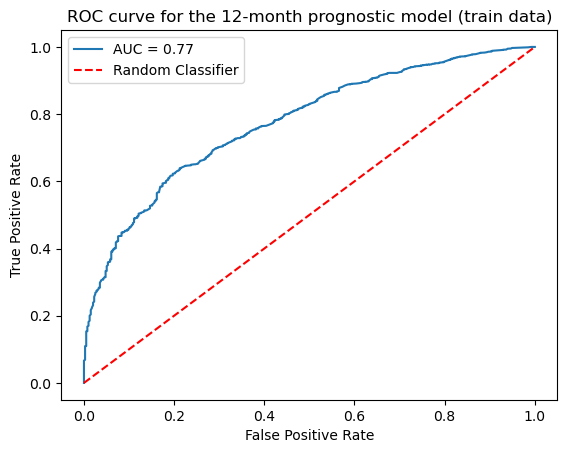

In [18]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 300]
}

base_model = LogisticRegression()

grid_search = GridSearchCV(
    estimator=base_model,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=0
)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

clf = LogisticRegression(**best_params)

clf.fit(X_train, y_train)

y_score = clf.predict_proba(X_train)[:, 1]

fpr, tpr, thresholds = roc_curve(y_train, y_score)
auc_score = roc_auc_score(y_train, y_score)

plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for the 12-month prognostic model (train data)')
plt.legend()
plt.show()

C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


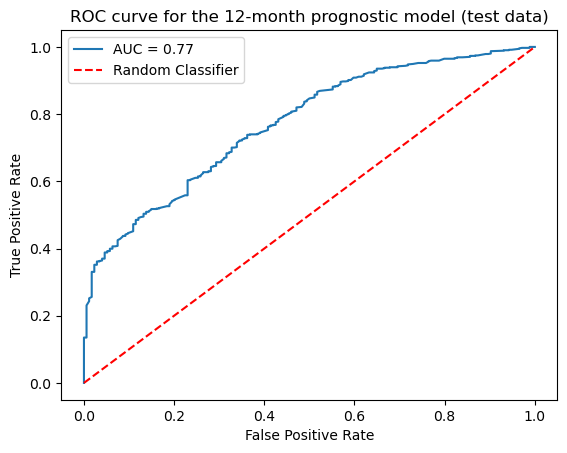

In [19]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
clf = LogisticRegression()  
clf.fit(X_train, y_train) 
y_score = clf.predict_proba(X_test)[:, 1]  
fpr, tpr, thresholds = roc_curve(y_test, y_score)
auc_score = roc_auc_score(y_test, y_score)
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}') 
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Classifier')  #
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')  
plt.title('ROC curve for the 12-month prognostic model (test data)')            
plt.legend()                    
plt.show()  

XGBoost模型的准确率： 0.8101694915254237


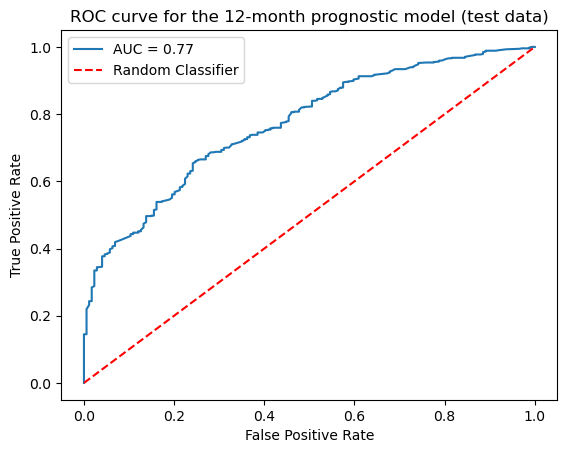

In [23]:
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBClassifier
model = XGBClassifier(learning_rate =0.1,
                      n_estimators=70,
                      max_depth=4,
                      min_child_weight=8,
                      gamma=0,
                      subsample=0.75,
                      colsample_bytree=0.8,
                      objective= 'binary:logistic',
                      nthread=4,
                      scale_pos_weight=1,
                      seed=16)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("XGBoost模型的准确率：", accuracy)
y_score = model.predict_proba(X_test)[:, 1]  
fpr, tpr, thresholds = roc_curve(y_test, y_score)
auc_score = roc_auc_score(y_test, y_score)
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}') 
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Classifier') 
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')   
plt.title('ROC curve for the 12-month prognostic model (test data)')        
plt.legend()                    
plt.show()  

C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


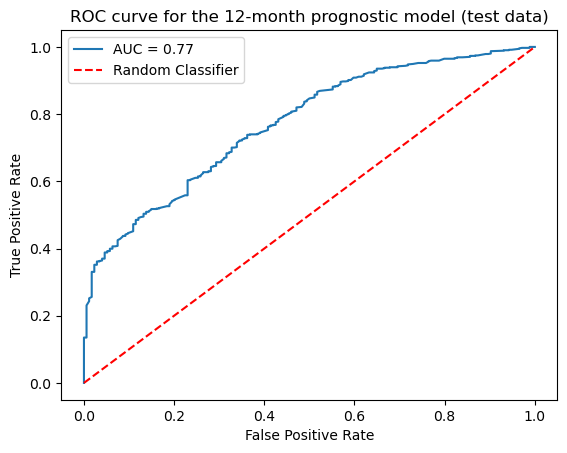

In [24]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
clf = LogisticRegression() 
clf.fit(X_train, y_train)   
y_score = clf.predict_proba(X_test)[:, 1]  
fpr, tpr, thresholds = roc_curve(y_test, y_score)
auc_score = roc_auc_score(y_test, y_score)
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}') 
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Classifier')  
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')  
plt.title('ROC curve for the 12-month prognostic model (test data)')           
plt.legend()                    
plt.show()  